# Load and Process Data
Import required libraries (pandas, matplotlib, seaborn), load metrics JSON files, and create DataFrame with session mapping.

In [28]:
# Import required libraries
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Directory containing metrics JSON files
metrics_dir = './frontend/logs/metrics'

# List to store all metrics data
metrics_data = []

# Parse each metrics file
for filename in os.listdir(metrics_dir):
    if filename.startswith('metrics_') and filename.endswith('.json'):
        filepath = os.path.join(metrics_dir, filename)
        with open(filepath, 'r') as f:
            data = json.load(f)
            session_id = data.get('session_id')
            tasks = data.get('tasks', [])
            for task in tasks:
                task['session_id'] = session_id
                metrics_data.append(task)

# Create a DataFrame from the metrics data
df = pd.DataFrame(metrics_data)

# Map session IDs to test cases from experiments.md (you need to create this mapping)
session_mapping = {
    '1732216540_20241121_111548': 'Test Case 1.1',
    '1732217107_20241121_112536': 'Test Case 1.2',
    '1732217675_20241121_113442': 'Test Case 1.3',
    '1732218058_20241121_114102': 'Test Case 2.1',
    '1732219554_20241121_120602': 'Test Case 2.2',
    '1732219944_20241121_121229': 'Test Case 2.3',
    '1732221443_20241121_123727': 'Test Case 3.1',
    '1732218757_20241121_115244': 'Test Case 3.2',
    '1732219207_20241121_120030': 'Test Case 3.3',
    '1732223505_20241121_131148': 'Test Case 4.1'
}

df['test_case'] = df['session_id'].map(session_mapping)

# Basic Metrics Analysis
Calculate and display basic statistics like total number of tasks, average duration, and success rates across all test cases.

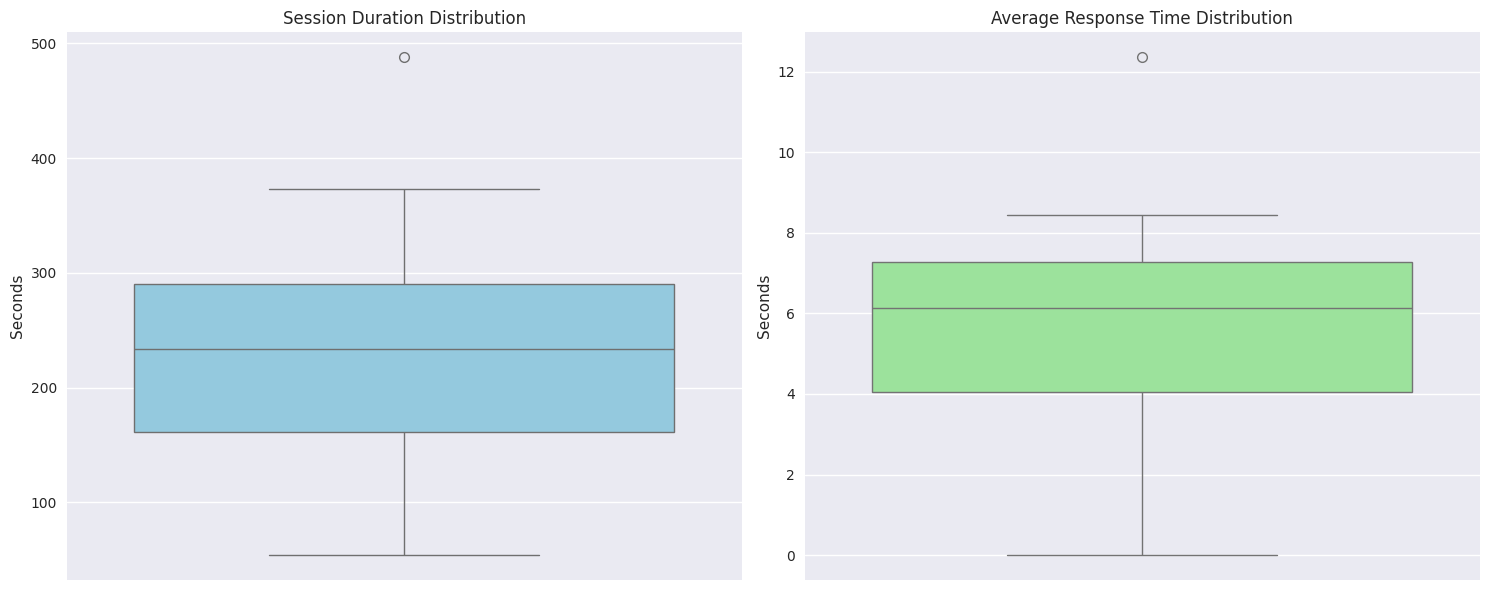

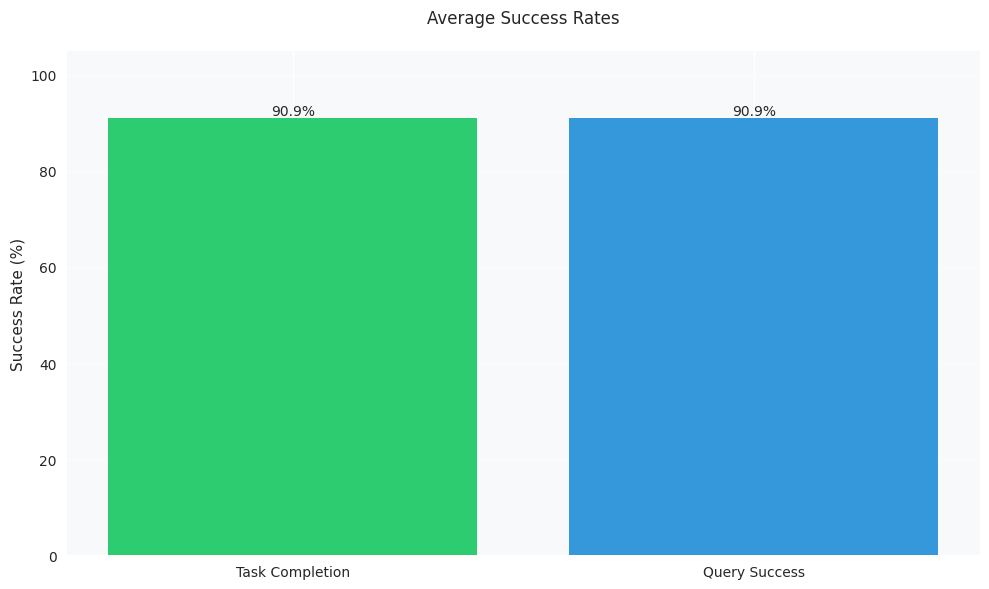

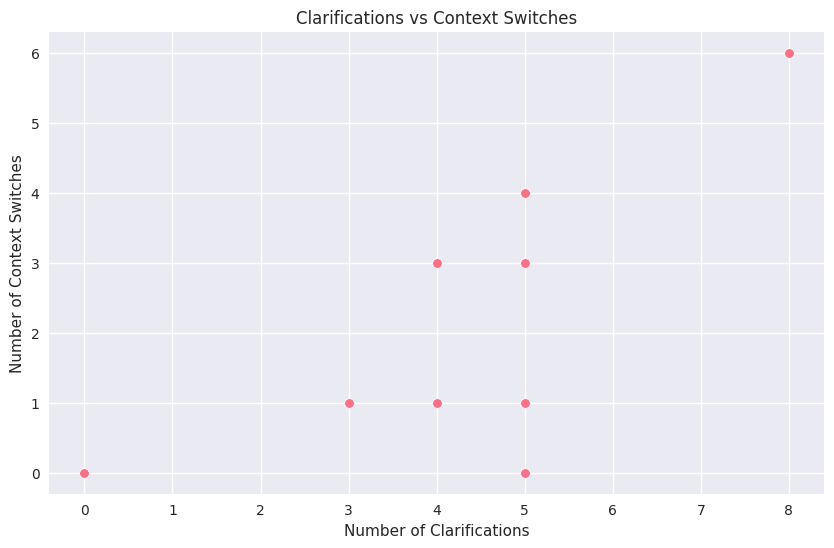

In [29]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Data Loading and Processing
def load_metrics_data(metrics_dir):
    metrics_data = []
    for filename in os.listdir(metrics_dir):
        if filename.startswith('metrics_') and filename.endswith('.json'):
            with open(os.path.join(metrics_dir, filename), 'r') as f:
                data = json.load(f)
                # Extract session level metrics
                session_metrics = {
                    'session_id': data['session_id'],
                    'total_duration': data['metrics']['total_duration'],
                    'avg_response_time': data['metrics']['avg_response_time'],
                    'task_completion_rate': data['metrics']['task_completion_rate'],
                    'query_success_rate': data['metrics']['query_success_rate'],
                    'context_switches': data['metrics']['context_switches'],
                    'total_clarifications': data['metrics']['total_clarifications']
                }
                metrics_data.append(session_metrics)
    return pd.DataFrame(metrics_data)

# Load data
df = load_metrics_data(metrics_dir)

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Duration and Response Time Distribution (Separated)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Duration plot
sns.boxplot(y=df['total_duration'], ax=ax1, color='skyblue')
ax1.set_title('Session Duration Distribution')
ax1.set_ylabel('Seconds')

# Response time plot
sns.boxplot(y=df['avg_response_time'], ax=ax2, color='lightgreen')
ax2.set_title('Average Response Time Distribution')
ax2.set_ylabel('Seconds')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
success_rates = df[['task_completion_rate', 'query_success_rate']].mean()

bars = plt.bar(['Task Completion', 'Query Success'], 
               success_rates * 100,
               color=['#2ecc71', '#3498db'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.title('Average Success Rates', pad=20, fontsize=12)
plt.ylabel('Success Rate (%)')
plt.ylim(0, 105)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('#f8f9fa')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Clarifications and Context Switches
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_clarifications', y='context_switches')
plt.title('Clarifications vs Context Switches')
plt.xlabel('Number of Clarifications')
plt.ylabel('Number of Context Switches')
plt.show()

# Duration Analysis by Test Case
Create bar plots comparing task durations across different test cases, with breakdowns by task type.

/home/tianyhe/Documents/vrchat-guide/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tianyhe/Documents/vrchat-guide/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


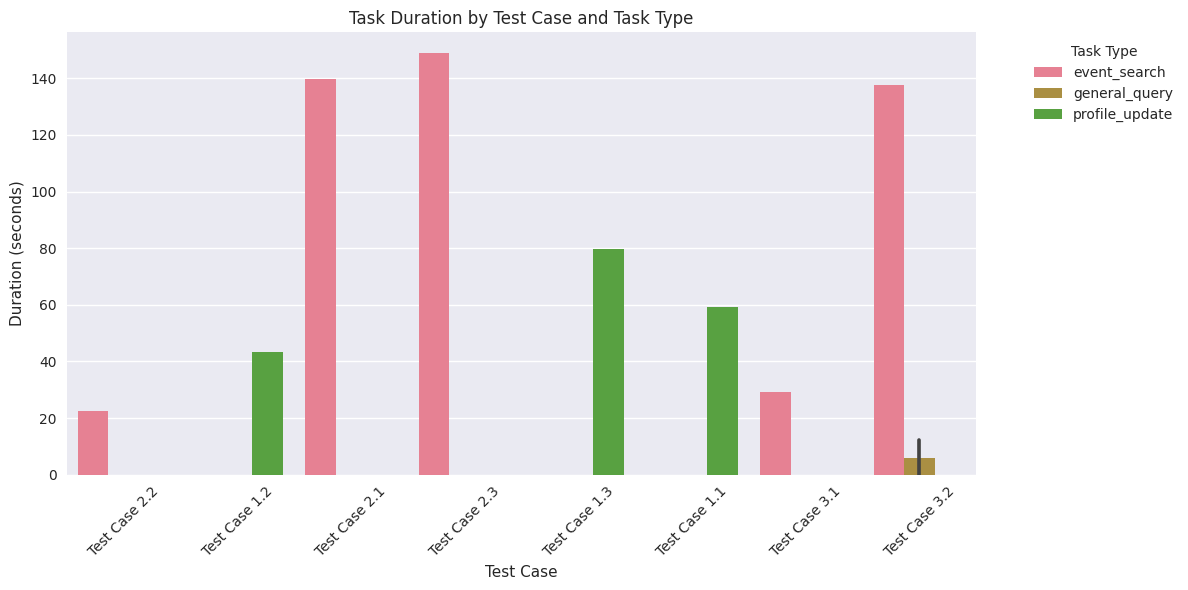


=== Performance Metrics Summary ===
Total Sessions Analyzed: 11
            Metric  Value
  Average Duration 234.0s
     Response Time   6.3s
Query Success Rate 100.0%
Avg Clarifications    4.3


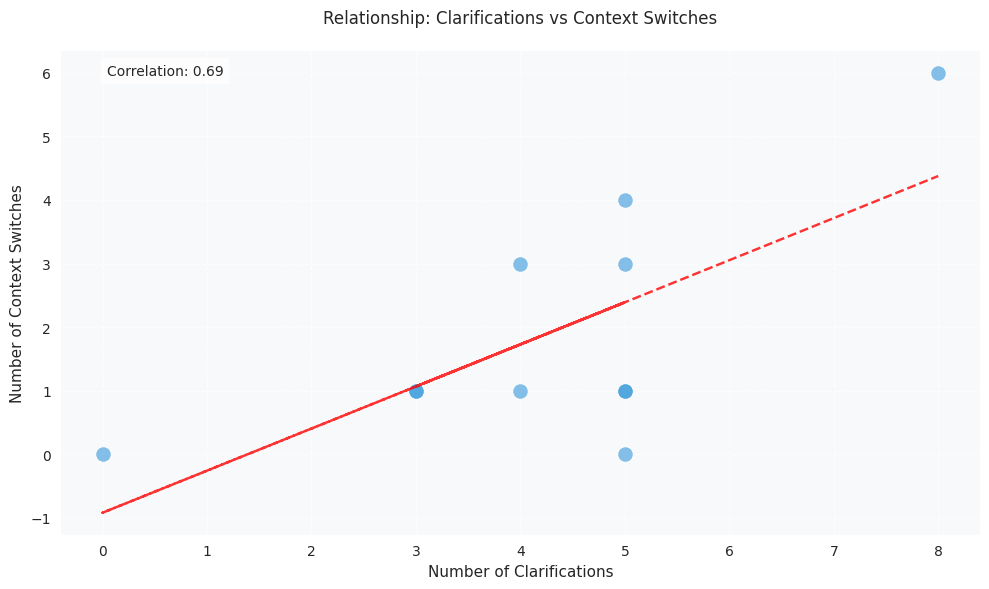

In [30]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

def load_metrics_data(metrics_dir):
    session_data = []
    task_data = []
    
    for filename in os.listdir(metrics_dir):
        if filename.startswith('metrics_') and filename.endswith('.json'):
            with open(os.path.join(metrics_dir, filename), 'r') as f:
                data = json.load(f)
                
                # Session level metrics
                session_metrics = {
                    'session_id': data['session_id'],
                    'user_id': data['user_id'],
                    'total_duration': data['duration'],
                    'avg_response_time': np.mean(data['response_times']),
                    'context_switches': data['context_switches'],
                    'total_clarifications': data['clarification_questions'],
                    'total_queries': data['total_queries'],
                    'successful_queries': data['successful_queries']
                }
                session_data.append(session_metrics)
                
                # Task level metrics
                for task in data['tasks']:
                    task_metrics = {
                        'session_id': data['session_id'],
                        'task_type': task['task_type'],
                        'duration': task['duration'],
                        'clarification_questions': task['clarification_questions'],
                        'completed': task['completed']
                    }
                    task_data.append(task_metrics)
    
    return pd.DataFrame(session_data), pd.DataFrame(task_data)

# Load data
session_df, task_df = load_metrics_data(metrics_dir)

# Map session IDs to test cases
session_mapping = {
    '1732216540_20241121_111548': 'Test Case 1.1',
    '1732217107_20241121_112536': 'Test Case 1.2',
    '1732217675_20241121_113442': 'Test Case 1.3',
    '1732218058_20241121_114102': 'Test Case 2.1',
    '1732219554_20241121_120602': 'Test Case 2.2',
    '1732219944_20241121_121229': 'Test Case 2.3',
    '1732221443_20241121_123727': 'Test Case 3.1',
    '1732218757_20241121_115244': 'Test Case 3.2'
}

session_df['test_case'] = session_df['session_id'].map(session_mapping)
task_df['test_case'] = task_df['session_id'].map(session_mapping)

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Task Duration by Test Case
plt.figure(figsize=(12, 6))
sns.barplot(data=task_df, x='test_case', y='duration', hue='task_type')
plt.title('Task Duration by Test Case and Task Type')
plt.xlabel('Test Case')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)
plt.legend(title='Task Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Calculate performance metrics from available data
query_success_rate = session_df['successful_queries'] / session_df['total_queries']

print("\n=== Performance Metrics Summary ===")
print(f"Total Sessions Analyzed: {len(session_df)}")
stats_df = pd.DataFrame({
    'Metric': ['Average Duration', 'Response Time', 'Query Success Rate', 'Avg Clarifications'],
    'Value': [
        f"{session_df['total_duration'].mean():.1f}s",
        f"{session_df['avg_response_time'].mean():.1f}s",
        f"{query_success_rate.mean()*100:.1f}%",
        f"{session_df['total_clarifications'].mean():.1f}"
    ]
})
print(stats_df.to_string(index=False))

# Clarifications vs Context Switches Analysis
plt.figure(figsize=(10, 6))
plt.scatter(session_df['total_clarifications'], 
           session_df['context_switches'],
           alpha=0.6,
           s=100,
           c='#3498db')

z = np.polyfit(session_df['total_clarifications'], session_df['context_switches'], 1)
p = np.poly1d(z)
plt.plot(session_df['total_clarifications'], 
         p(session_df['total_clarifications']), 
         "r--", 
         alpha=0.8,
         )

plt.title('Relationship: Clarifications vs Context Switches', pad=20)
plt.xlabel('Number of Clarifications')
plt.ylabel('Number of Context Switches')

plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f8f9fa')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add correlation coefficient
corr = session_df['total_clarifications'].corr(session_df['context_switches'])
plt.annotate(f'Correlation: {corr:.2f}', 
            xy=(0.05, 0.95), 
            xycoords='axes fraction',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.tight_layout()
plt.show()



# Task Type Distribution
Generate pie charts and bar plots showing the distribution of different task types across test cases.

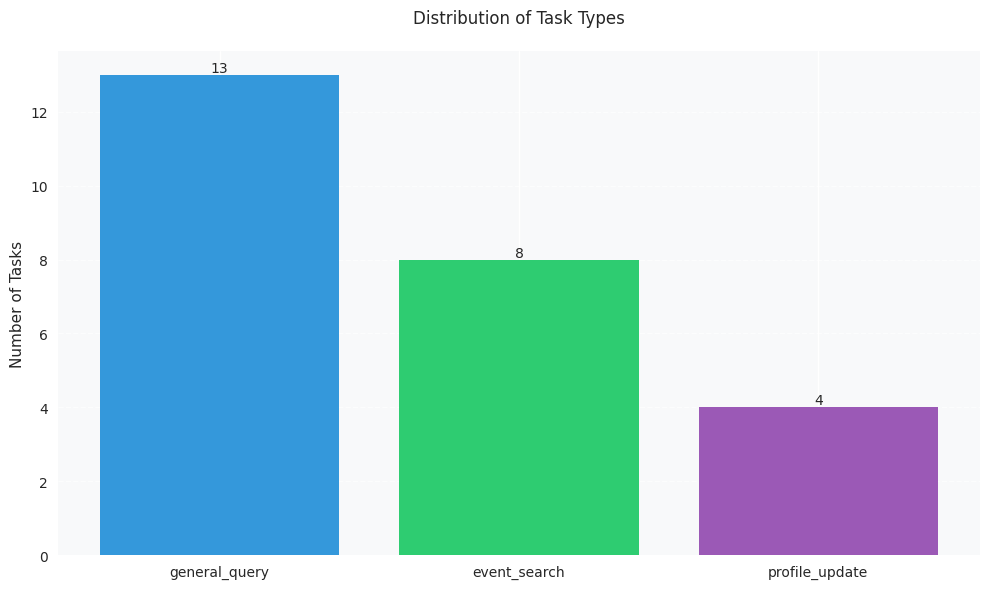

In [31]:
# Task Type Distribution
task_counts = task_df['task_type'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(task_counts.index, 
               task_counts.values,
               color=['#3498db', '#2ecc71', '#9b59b6'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.title('Distribution of Task Types', pad=20)
plt.ylabel('Number of Tasks')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('#f8f9fa')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Performance Across Test Categories
Group and analyze metrics by test categories (Basic Profile Creation, Preference Elicitation, Event Recommendations) defined in the evaluation framework.

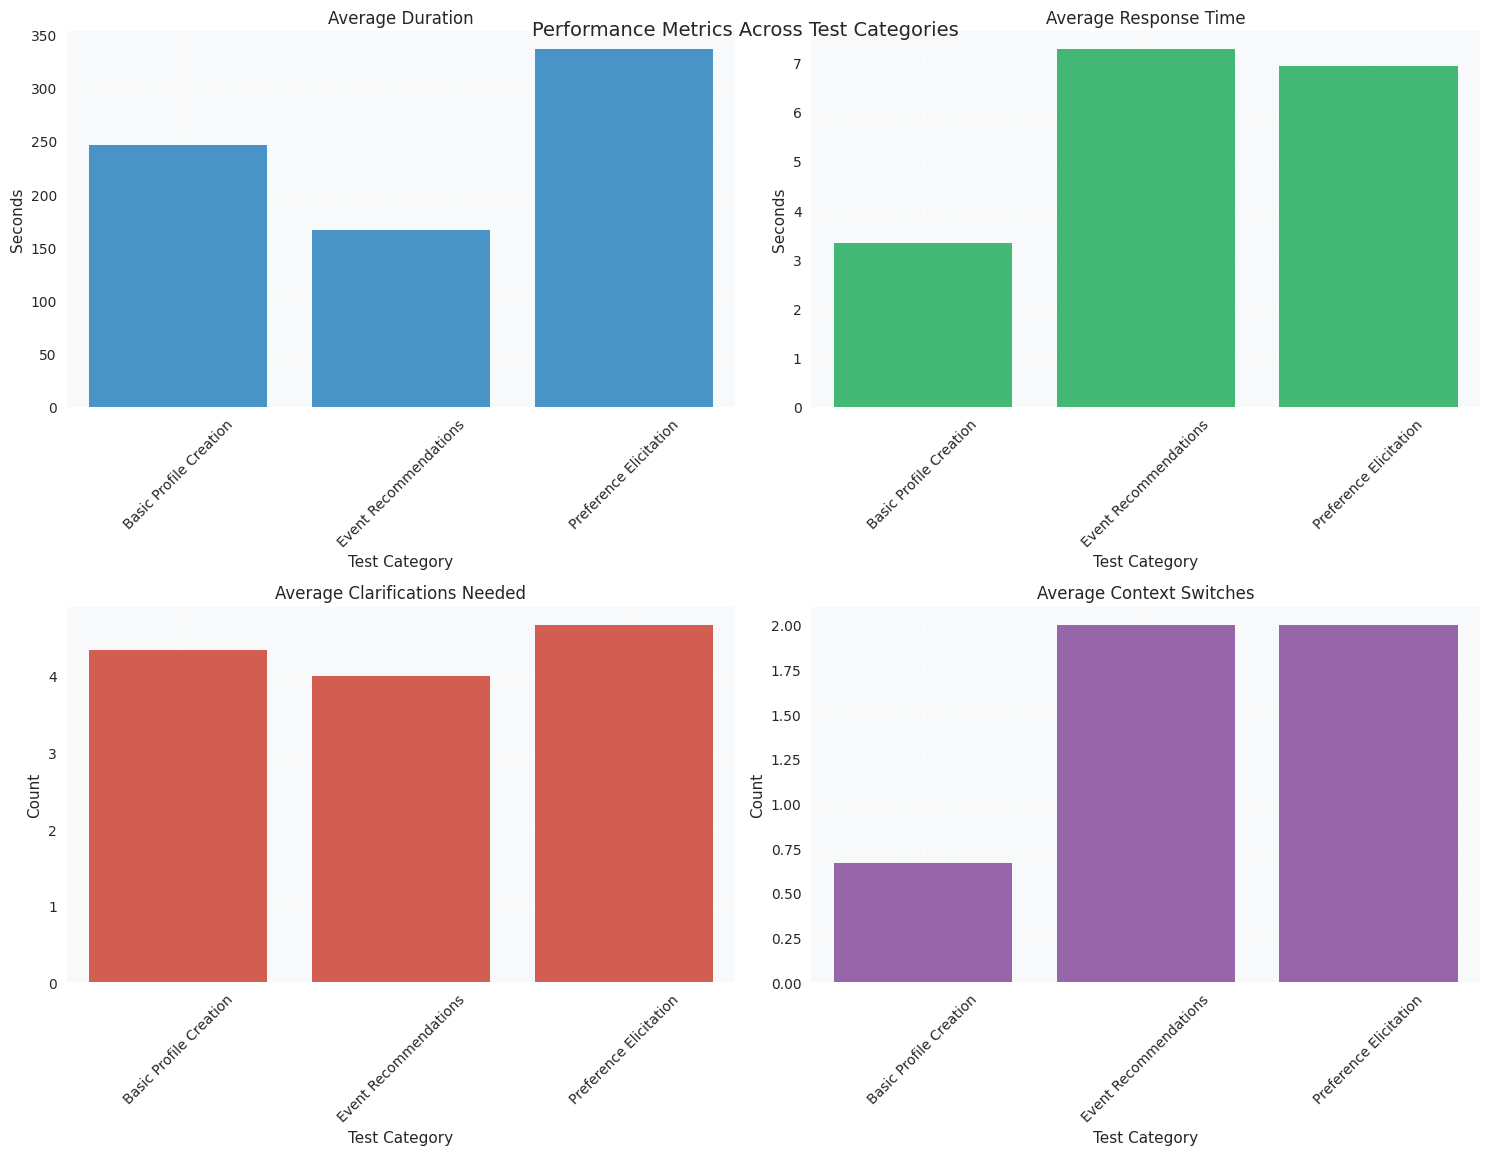


=== Performance Summary by Test Category ===
         Test Category  Avg Duration  Avg Response Time  Avg Clarifications  Avg Context Switches
Basic Profile Creation        246.51               3.33                4.33                  0.67
 Event Recommendations        166.22               7.27                4.00                  2.00
Preference Elicitation        336.18               6.94                4.67                  2.00


In [32]:
def create_category_analysis(session_df, task_df):
    test_categories = {
    # 1. Basic Profile Creation Tests
    'Test Case 1.1': 'Basic Profile Creation',  # Direct Path
    'Test Case 1.2': 'Basic Profile Creation',  # Fragmented Information
    'Test Case 1.3': 'Basic Profile Creation',  # Profile Correction
    
    # 2. Preference Elicitation Tests
    'Test Case 2.1': 'Preference Elicitation',  # Explicit Preferences
    'Test Case 2.2': 'Preference Elicitation',  # Implicit Preferences
    'Test Case 2.3': 'Preference Elicitation',  # Contradictory Preferences
    
    # 3. Event Recommendation Tests
    'Test Case 3.1': 'Event Recommendations',   # Direct Match
    'Test Case 3.2': 'Event Recommendations',   # Complex Matching
    'Test Case 3.3': 'Event Recommendations',   # Preference Refinement
    
    # 4. Context Switching Tests
    'Test Case 4.1': 'Context Switching'        # Multiple Conversations
}

    session_df['test_category'] = session_df['test_case'].map(test_categories)
    task_df['test_category'] = task_df['test_case'].map(test_categories)

    if len(session_df) > 0:
        # Calculate category-level metrics
        category_stats = session_df.groupby('test_category').agg({
            'total_duration': 'mean',
            'avg_response_time': 'mean',
            'total_clarifications': 'mean',
            'context_switches': 'mean'
        }).reset_index()

        category_stats.columns = ['Test Category', 'Avg Duration', 'Avg Response Time', 
                                'Avg Clarifications', 'Avg Context Switches']

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Performance Metrics Across Test Categories', fontsize=14, y=0.95)

        # Duration plot
        sns.barplot(data=category_stats, x='Test Category', y='Avg Duration', 
                   ax=axes[0,0], color='#3498db')
        axes[0,0].set_title('Average Duration')
        axes[0,0].set_ylabel('Seconds')
        axes[0,0].tick_params(axis='x', rotation=45)

        # Response time plot
        sns.barplot(data=category_stats, x='Test Category', y='Avg Response Time', 
                   ax=axes[0,1], color='#2ecc71')
        axes[0,1].set_title('Average Response Time')
        axes[0,1].set_ylabel('Seconds')
        axes[0,1].tick_params(axis='x', rotation=45)

        # Clarifications plot
        sns.barplot(data=category_stats, x='Test Category', y='Avg Clarifications', 
                   ax=axes[1,0], color='#e74c3c')
        axes[1,0].set_title('Average Clarifications Needed')
        axes[1,0].set_ylabel('Count')
        axes[1,0].tick_params(axis='x', rotation=45)

        # Context switches plot
        sns.barplot(data=category_stats, x='Test Category', y='Avg Context Switches', 
                   ax=axes[1,1], color='#9b59b6')
        axes[1,1].set_title('Average Context Switches')
        axes[1,1].set_ylabel('Count')
        axes[1,1].tick_params(axis='x', rotation=45)

        for ax in axes.flat:
            ax.grid(True, linestyle='--', alpha=0.7)
            ax.set_facecolor('#f8f9fa')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

        plt.tight_layout()
        plt.show()

        print("\n=== Performance Summary by Test Category ===")
        print(category_stats.round(2).to_string(index=False))
        
    else:
        print("No data available for category analysis")

create_category_analysis(session_df, task_df)